
**Problem Statment**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know :

*     Which variables are significant in predicting the demands for shred bikes.
*     How well those variables describe the bike demands.



In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm


## Data Preparation


In [2]:
# Reading dataframe
df = pd.read_csv('D:\casestudy_upgrad\BOOM_Bikes\day.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\melvi\AppData\Local\Temp\ipykernel_6548\2379565186.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('D:\casestudy_upgrad\BOOM_Bikes\day.csv')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# structure od dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*The Feature 'instant' is removed as it is just unique number .


*The Feature 'dtday' is removed because we have already other features like: yr, mnth, weekday.

In [4]:
df = df.drop(['instant','dteday'],axis =1)

In [5]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [7]:
# Encoding/mapping the month column

df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [8]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday', \
                                   5:'Friday',6:'Saturday',0:'Sunday'})

In [9]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear_clouds' ,2: 'cloudy' , 3: 'Light',4:'heavy'})

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Saturday,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sunday,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Monday,1,Clear_clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tuesday,1,Clear_clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wednesday,1,Clear_clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


# Data Visualization 

> Features such as 'temp','atemp','hum','windspeed','casual','registered','cnt'are numerical features

>Cnt is the target variable

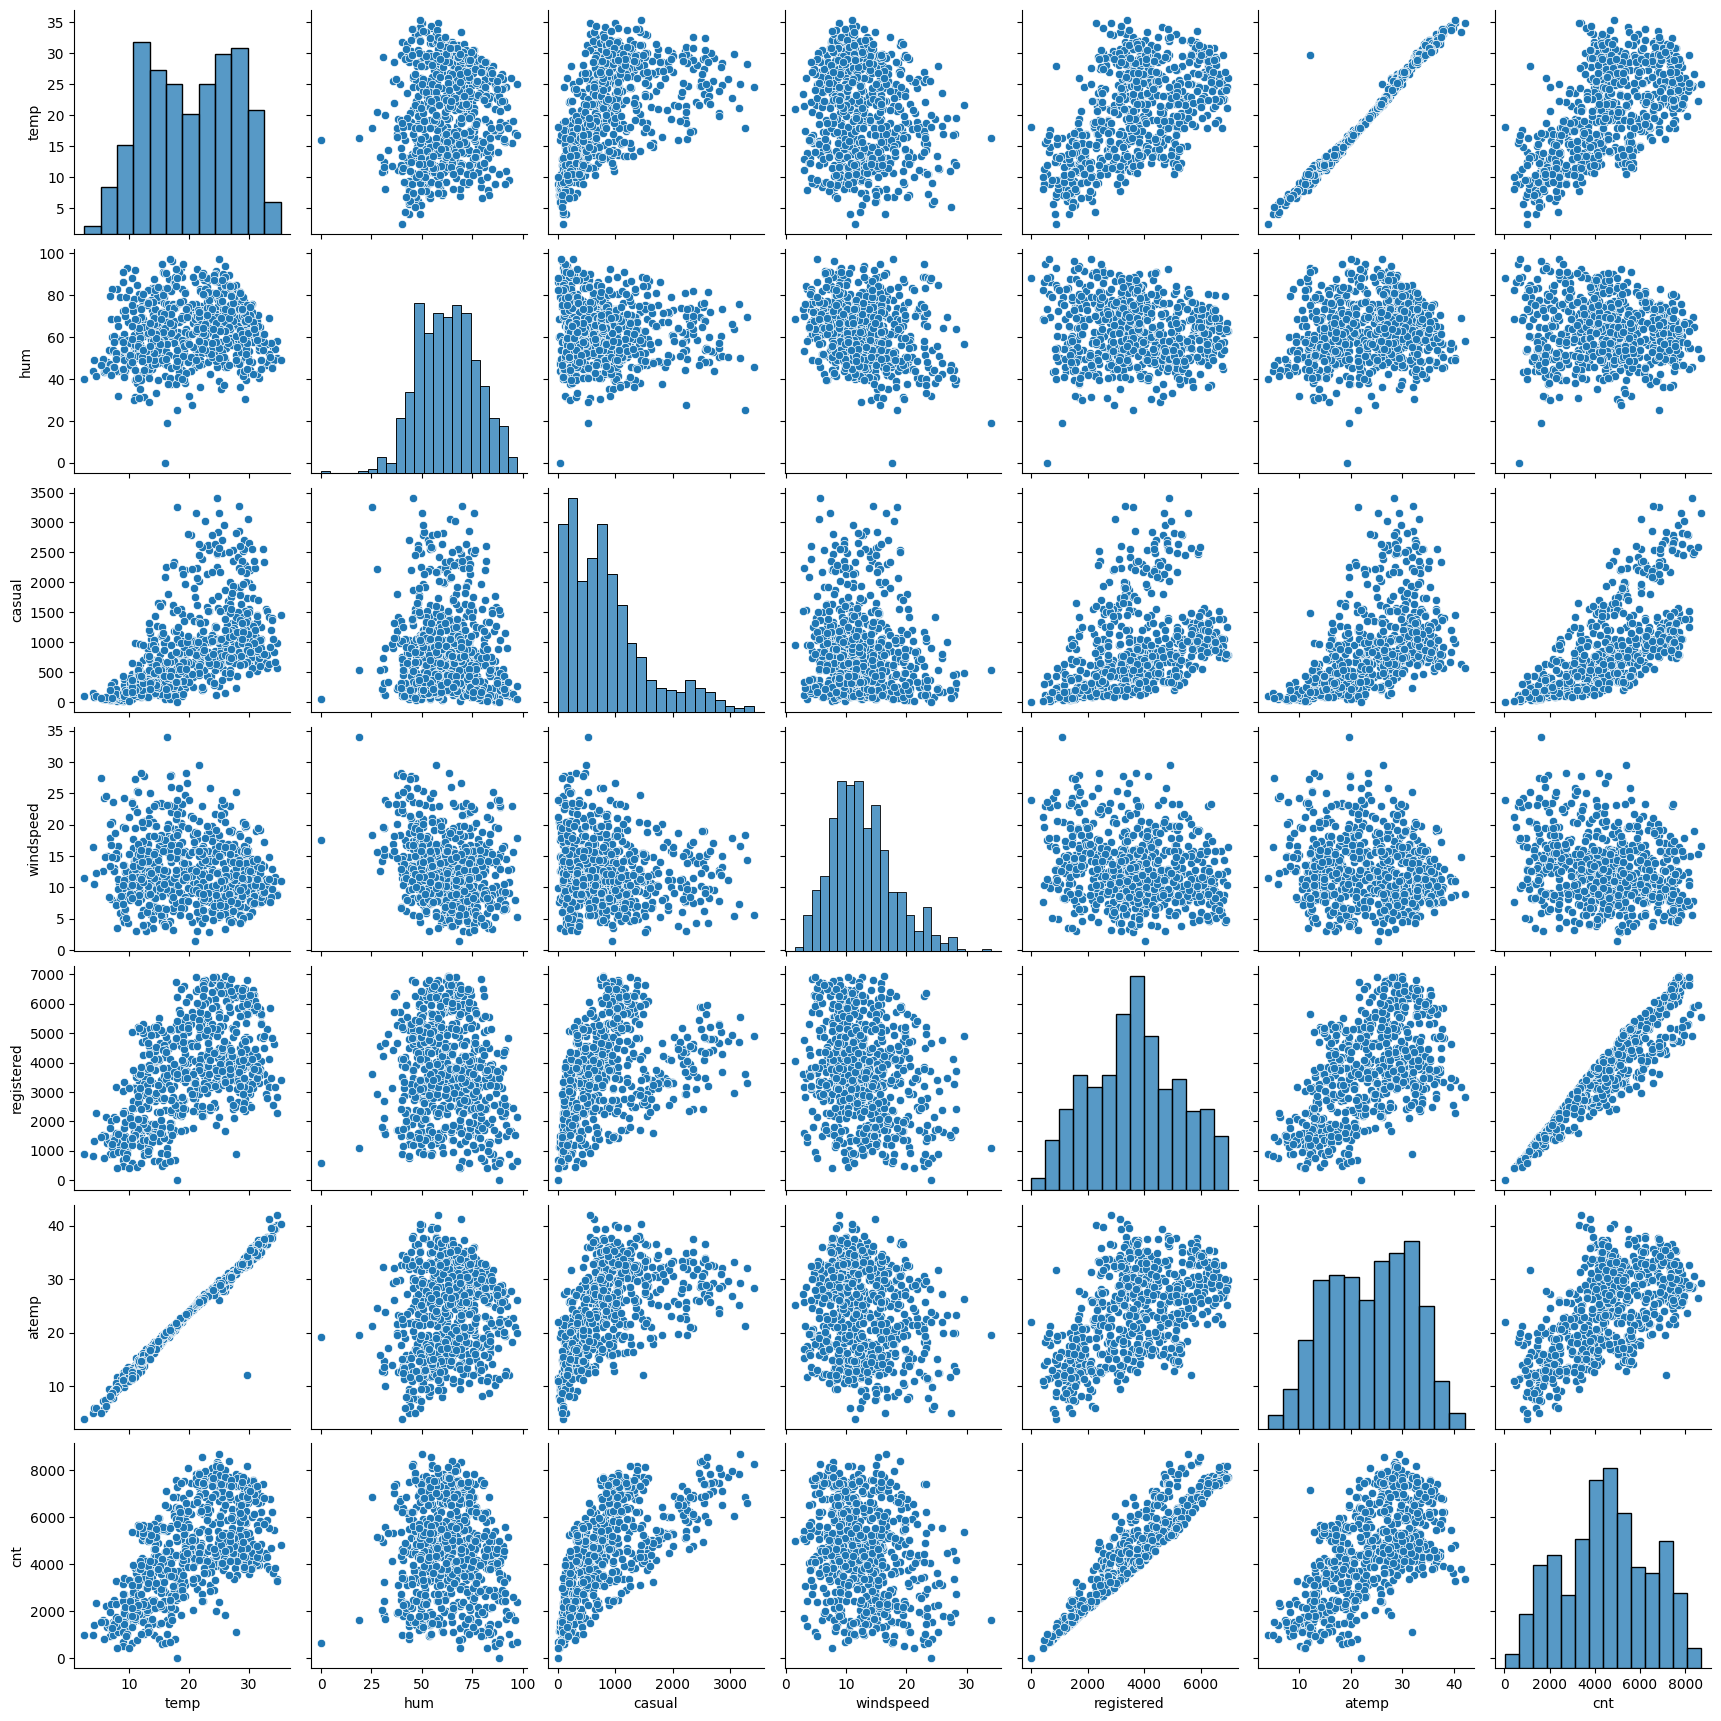

In [12]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

Based on the above numerical feature description, we observe the following:

Some columns, such as 'casual', may contain outliers.
The data is not uniformly distributed across all features, so scaling is necessary for better interpretation.
MinMax Scaling can be used as it effectively handles outliers in the data

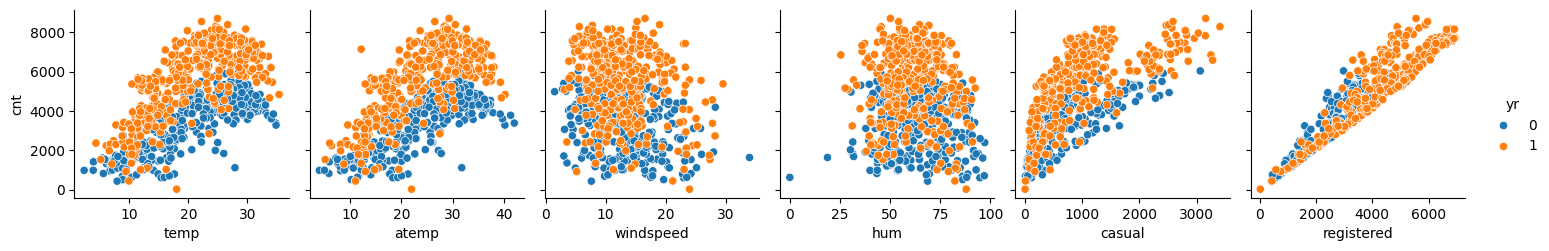

In [13]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(df, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

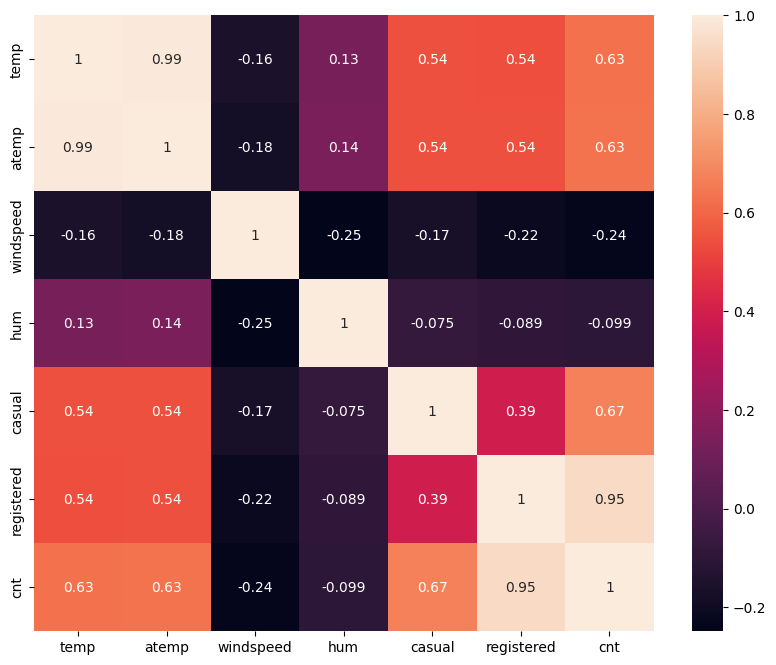

In [14]:
plt.figure(figsize = (10,8
))
sns.heatmap(df[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

Registered bike users are more numerous than casual users and are strongly correlated with the target variable.
Temp and atemp are very strongly correlated, so one of these variables can be dropped.(multicollinear)
Humidity does not have a significant negative effect on the target variable.
Since a user's registration status (whether registered or casual) can only be determined after they rent a bike, both of these features can be considered as target features. Given that we already have a target feature, these two can be dropped.

In [15]:
df = df.drop(['atemp','casual','registered'],axis =1)

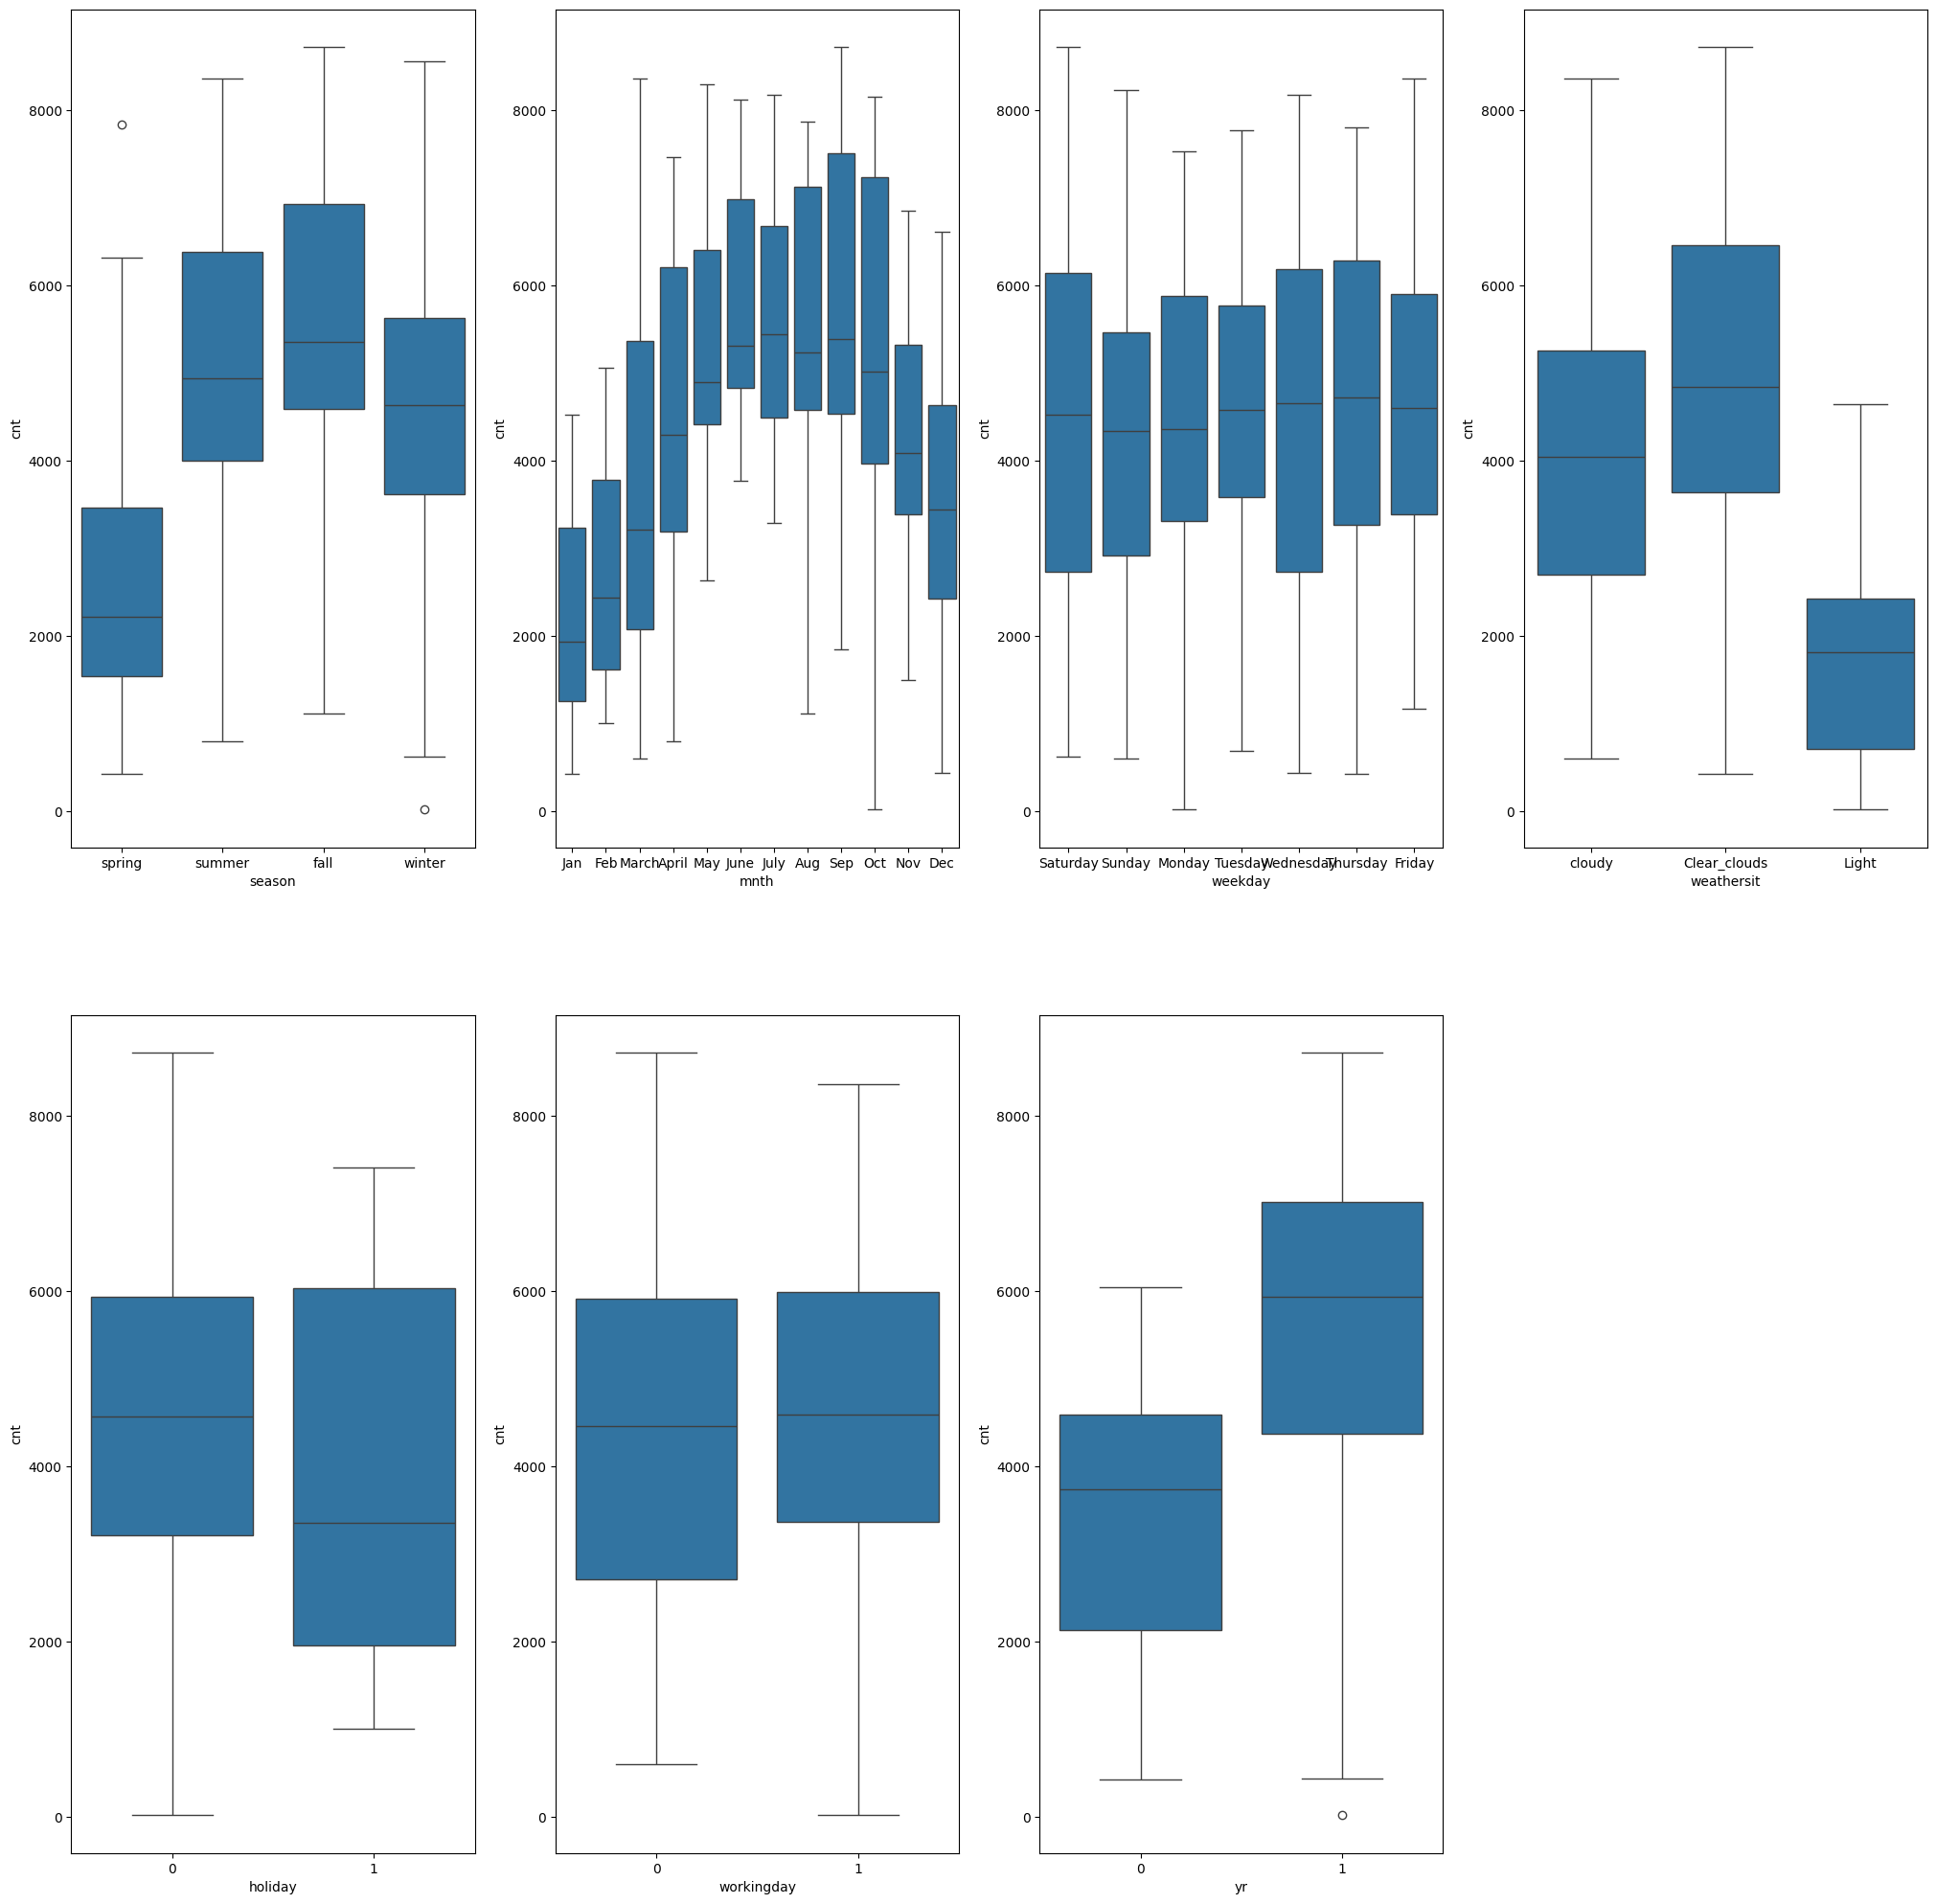

In [16]:
plt.figure(figsize=(25, 25))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [17]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Encoding categorical variables

#### The feature 'season' has four levels: 1 for spring, 2 for summer, 3 for fall, and 4 for winter. Therefore, it should be encoded using three dummy variables



In [18]:

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [19]:
df= pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [20]:
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [21]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light', 'cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

####  Feature 'holiday'
This has been already encoded to binary ,
1-holiday
0-no holiday

    

#### Understanding the Feature 'weekday'
weekday : day of the week , so this Feature needs Encoding

It can be encoded as follow:

{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday'}


# Visualization after encoding

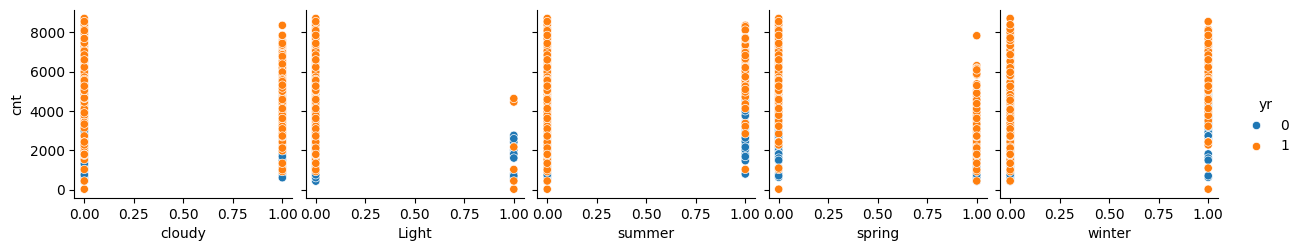

In [22]:
sns.pairplot(df,x_vars =['cloudy','Light','summer','spring','winter'],y_vars='cnt',hue ='yr')
plt.show()

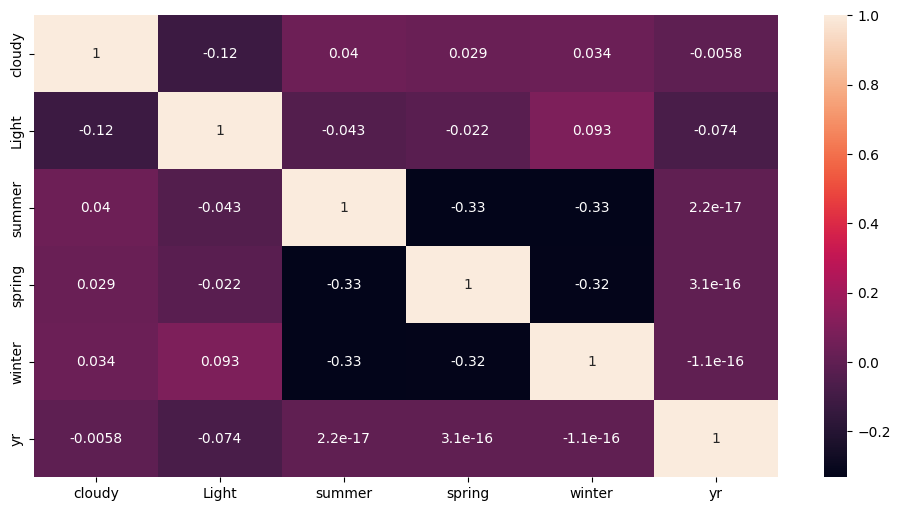

In [23]:
plt.figure(figsize = (12,6))
sns.heatmap(df[['cloudy','Light','summer','spring','winter','yr']].corr(),annot =True)
plt.show()

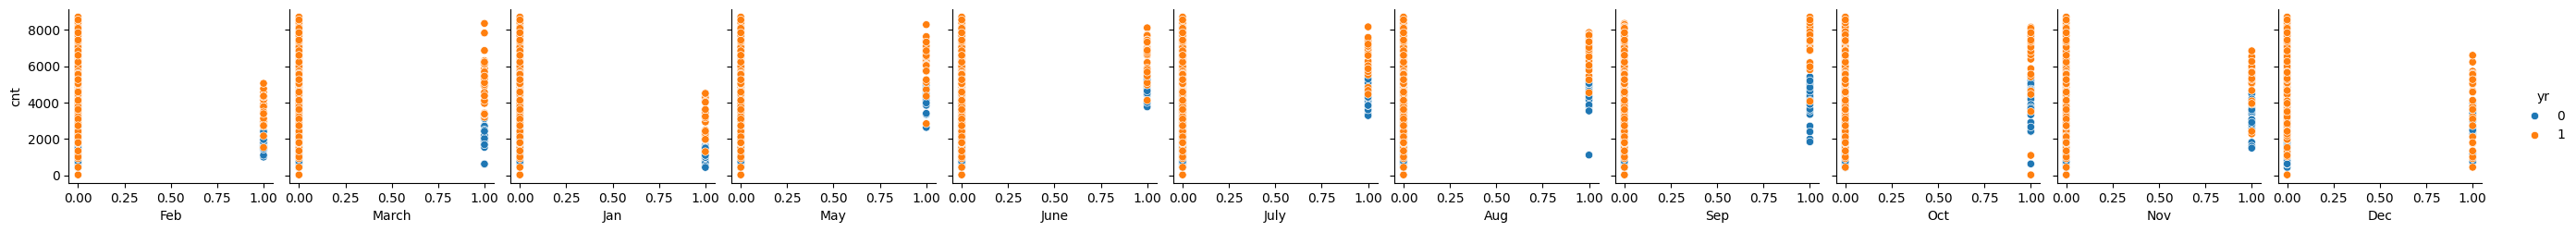

In [24]:
sns.pairplot(df,x_vars =['Feb','March','Jan','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr')
plt.show()

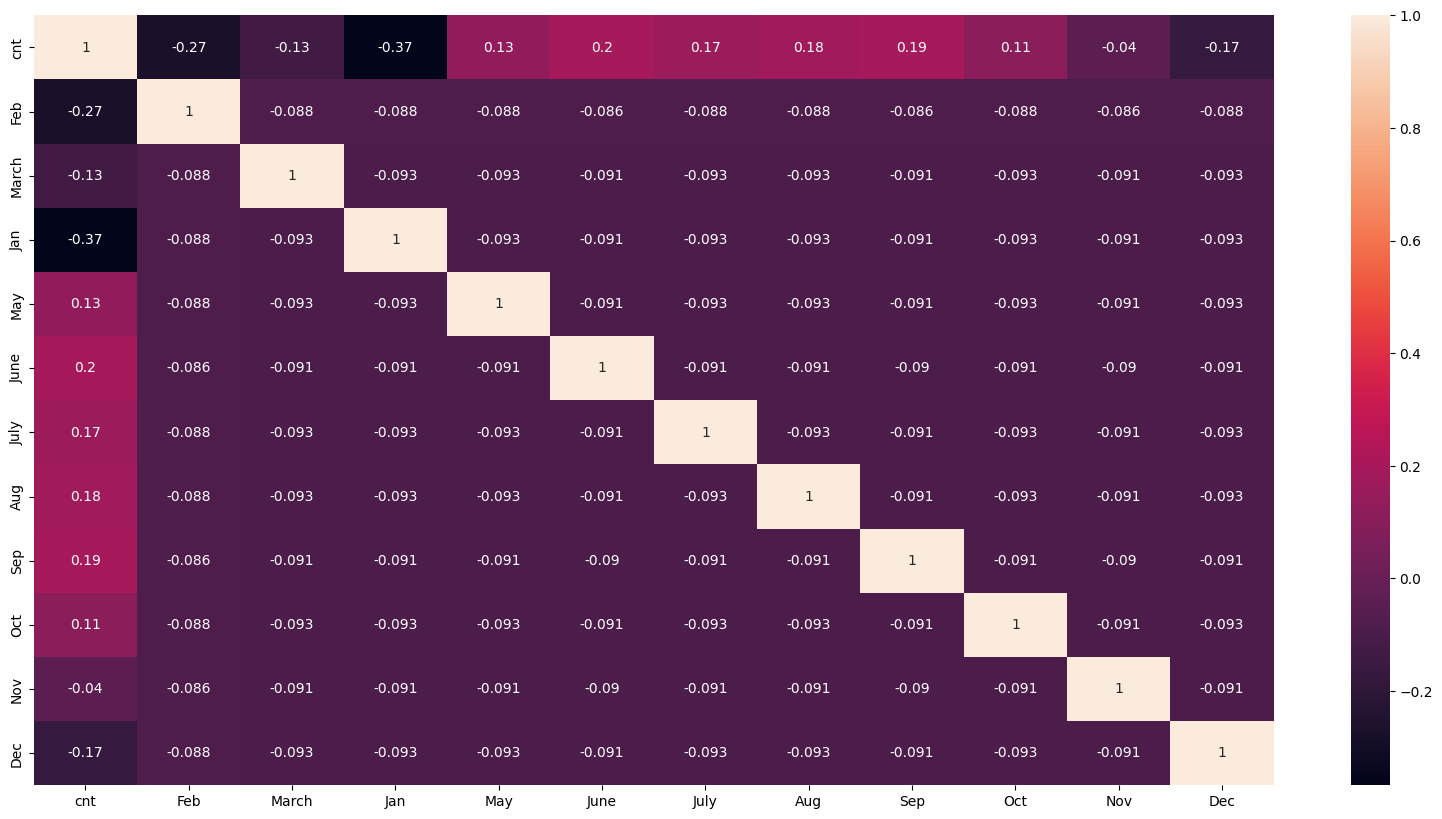

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(df[['cnt','Feb','March','Jan','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

In [26]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light', 'cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

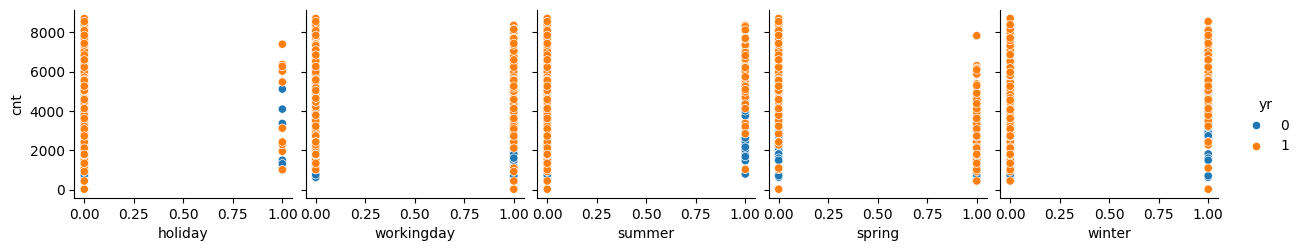

In [27]:
sns.pairplot(df,x_vars =['holiday', 'workingday','summer','spring','winter'],y_vars='cnt',hue ='yr')
plt.show()

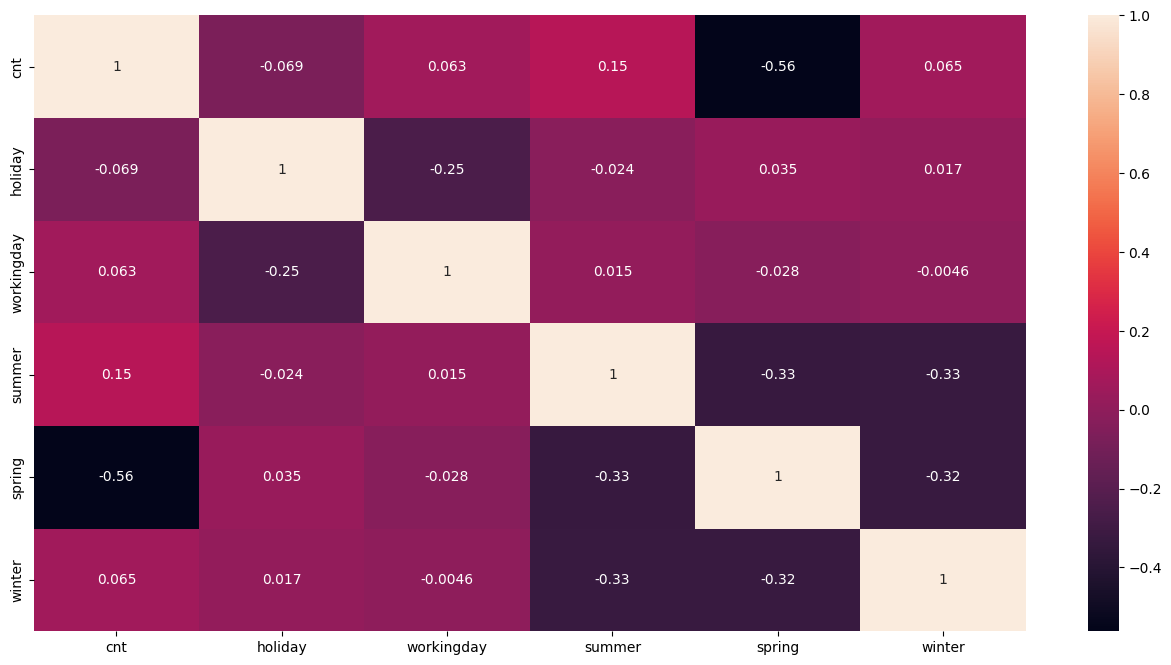

In [28]:
plt.figure(figsize = (16,8))
sns.heatmap(df[['cnt','holiday', 'workingday','summer','spring','winter']].corr(),annot = True)
plt.show()

Most of the Bike has been rented during the weekdays 
Users Prefer to Rent Bike if the Environment is Clear
More Number of Bike has been rented in the year 2019 than last year (2018) , it shows BOOM Bikes are doing Good Business.


## **Data Modelling**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   Aug         730 non-null    bool   
 8   Dec         730 non-null    bool   
 9   Feb         730 non-null    bool   
 10  Jan         730 non-null    bool   
 11  July        730 non-null    bool   
 12  June        730 non-null    bool   
 13  March       730 non-null    bool   
 14  May         730 non-null    bool   
 15  Nov         730 non-null    bool   
 16  Oct         730 non-null    bool   
 17  Sep         730 non-null    bool   
 18  Monday      730 non-null    bool   
 19  Saturday    730 non-null    b

In [30]:

# Identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
df[bool_columns] = df[bool_columns].astype(int)


In [31]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [32]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Light', 'cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [33]:
# As we saw that Data we were unfiform across the all the Features hence Scaling is Required.
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
Aug,510.0,0.096078,0.294988,0.0,0.000000,0.000000,0.000000,1.0
Dec,510.0,0.084314,0.278131,0.0,0.000000,0.000000,0.000000,1.0
Feb,510.0,0.066667,0.249689,0.0,0.000000,0.000000,0.000000,1.0


In [35]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.head()

(510, 28)


576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

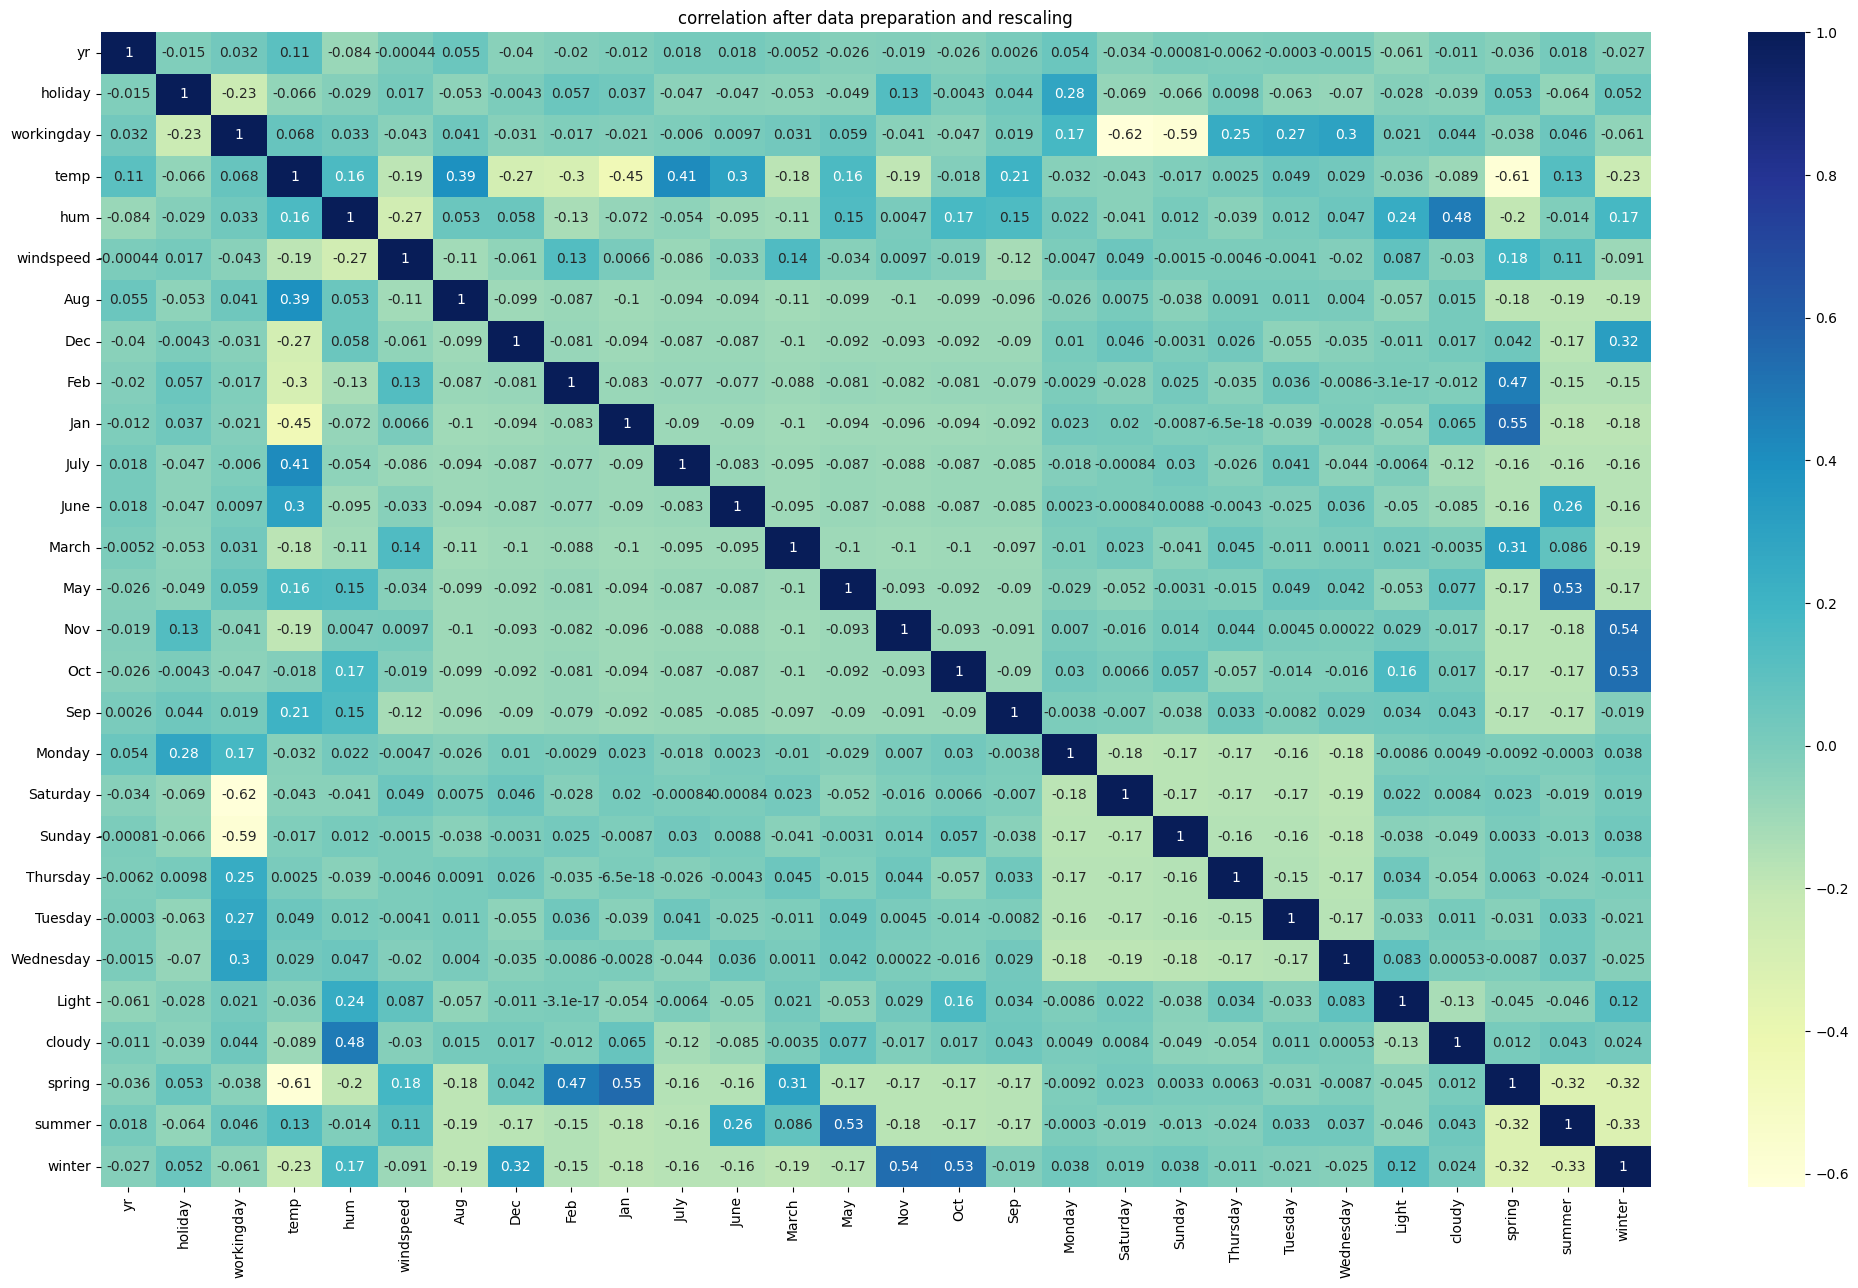

In [36]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)
plt.title('correlation after data preparation and rescaling')
plt.show()

#### *Feature Selection using RFE(Recursive Feature Elimination)*

In [37]:
lm = LinearRegression()

# Fit the model on the training data
lm.fit(X_train, y_train)

# Running RFE with the number of features to select set to 15
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Get the support (selected features as True)
support = rfe.support_

# Get the names of the selected features
selected_features = X_train.columns[support]

# Print the selected features
print("Selected features:")
print(selected_features)

# Optionally, you can visualize or further analyze the ranking and support
print("\nFeature Ranking:")
print(ranking)

Selected features:
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Saturday', 'Sunday', 'Light', 'cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

Feature Ranking:
[ 1  1  1  1  1  1  7  4  5  2  1 12 14  6  3  9  1  8  1  1 11 10 13  1
  1  1  1  1]


In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Light', True, 1),
 ('cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [39]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Saturday', 'Sunday', 'Light', 'cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [40]:
# Features Rejected by the RFE
X_train.columns[~(rfe.support_)]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'March', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

***Building Model using statsmodels for the detailed statistics***

In [41]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [42]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,July,Sep,Saturday,Sunday,Light,cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [43]:
# Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        22:36:30   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.000       0.145       0.254
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday     0.0837      0.010      8.665      0.000       0.065       0.103
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
Saturday       0.0937      0.012      8.040      0.000       0.071       0.117
Sunday         0.0406      0.012      3.315      0.001       0.017       0.065
Light         -0.2450      0.026     -9.395      0.000      -0.296      -0.194
cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> As the Statistics Report say there is strong multicollinearity problems so we need to check for VIF

In [44]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

c:\Users\melvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\melvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,holiday,inf
3,workingday,inf
9,Saturday,inf
10,Sunday,inf
13,spring,5.02
4,temp,3.62
15,winter,3.49
14,summer,2.62
5,hum,1.91
12,cloudy,1.57


In [45]:
# As VIF is Infnity for the Feature ,'holiday','workingday','Saturday','Sunday' we can drop it
X_train_rfe = X_train_rfe.drop(['holiday','workingday','Saturday','Sunday'],axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'July', 'Sep', 'Light',
       'cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [46]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.16e-188
Time:                        22:36:32   Log-Likelihood:                 502.04
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     498   BIC:                            -929.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2831      0.035      8.102      0.000       0.214       0.352
yr             0.2297      0.008     27.882      0.000       0.214       0.246
temp           0.5310      0.034     15.555      0.000       0.464       0.598
hum           -0.1733      0.038     -4.528      0.000      -0.249      -0.098
windspeed     -0.1840      0.026     -7.052      0.000      -0.235      -0.133
July          -0.0562      0.019     -3.024      0.003      -0.093      -0.020
Sep            0.0798      0.017      4.711      0.000       0.047       0.113
Light         -0.2326      0.027     -8.711      0.000      -0.285      -0.180
cloudy        -0.0509      0.011     -4.787      0.000      -0.072      -0.030
spring        -0.0587      0.021     -2.775      0.006      -0.100      -0.017
summer         0.0535      0.015      3.517      0.000       0.024       0.083
winter         0.0951      0.018      5.431      0.000       0.061       0.130
==============================================================================
Omnibus:                       69.912   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.944
Skew:                          -0.702   Prob(JB):                     1.03e-38
Kurtosis:                       5.503   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,74.36
9,spring,5.01
2,temp,3.61
11,winter,3.48
10,summer,2.62
3,hum,1.89
8,cloudy,1.55
5,July,1.48
6,Sep,1.29
7,Light,1.24


In [48]:
# As VIF is greater than 5, so removing spring
X_train_rfe = X_train_rfe.drop(['spring'],axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'July', 'Sep', 'Light',
       'cloudy', 'summer', 'winter'],
      dtype='object')

In [49]:
# Add constant to all the Variables
X_train_sm = sm.add_constant(X_train_rfe)
# Create the Model
lr = sm.OLS(y_train, X_train_sm)
# Fit the Model
lr_model = lr.fit()
# View the Parameter of the Model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.99e-188
Time:                        22:36:33   Log-Likelihood:                 498.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     499   BIC:                            -927.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2221      0.027      8.124      0.000       0.168       0.276
yr             0.2283      0.008     27.577      0.000       0.212       0.245
temp           0.6018      0.023     26.339      0.000       0.557       0.647
hum           -0.1854      0.038     -4.842      0.000      -0.261      -0.110
windspeed     -0.1917      0.026     -7.337      0.000      -0.243      -0.140
July          -0.0463      0.018     -2.524      0.012      -0.082      -0.010
Sep            0.0932      0.016      5.701      0.000       0.061       0.125
Light         -0.2272      0.027     -8.475      0.000      -0.280      -0.175
cloudy        -0.0483      0.011     -4.529      0.000      -0.069      -0.027
summer         0.0832      0.011      7.633      0.000       0.062       0.105
winter         0.1337      0.011     12.472      0.000       0.113       0.155
==============================================================================
Omnibus:                       63.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.272
Skew:                          -0.682   Prob(JB):                     3.47e-31
Kurtosis:                       5.177   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Again Checking the VIF Score
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,44.90
3,hum,1.87
2,temp,1.60
8,cloudy,1.54
5,July,1.43
9,summer,1.33
10,winter,1.29
7,Light,1.23
6,Sep,1.19
4,windspeed,1.18


In [ ]:
X_train_rfe.shape

(510, 13)

>  ** Overall model is a good Fit.**

>  **We got quite Good Adjusted R2 Score i.e 83.5%** 

>  **All the P Value are less than 0.05, Which say that all the 10 Features are Statistically Significant**

>  **Hence we can go ahaed with the current Model for Prediction and Evaluation.**

## **Residual Analysis**

In [ ]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_sm)
res = (y_train - y_train_pred)

### *Looking for the Assumption : Normality*

C:\Users\melvi\AppData\Local\Temp\ipykernel_11312\3869665986.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




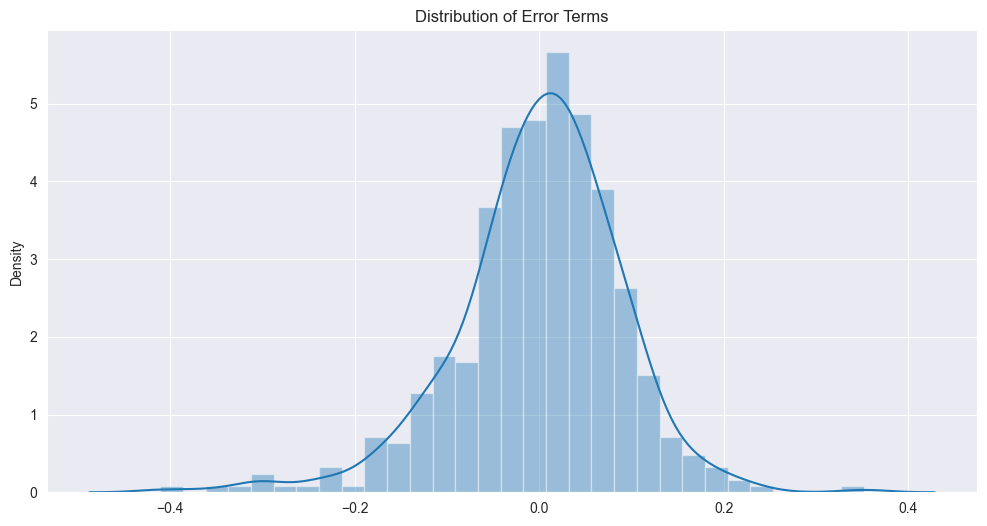

In [ ]:
# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

> **We can see Error Terms are normally Distributed with mean Zero. Hence Model is Actaully obeying the assumption of Normality**.

### *Looking for patterns in the residuals*

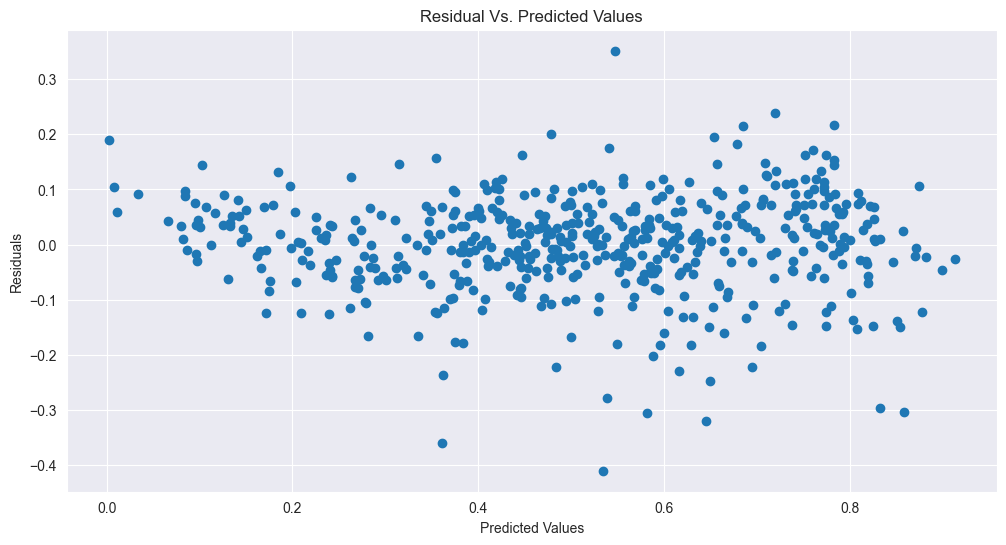

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

> **We can see there is no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say
Error terms are independent of each other.** 

### *Looking for Constant Variance*

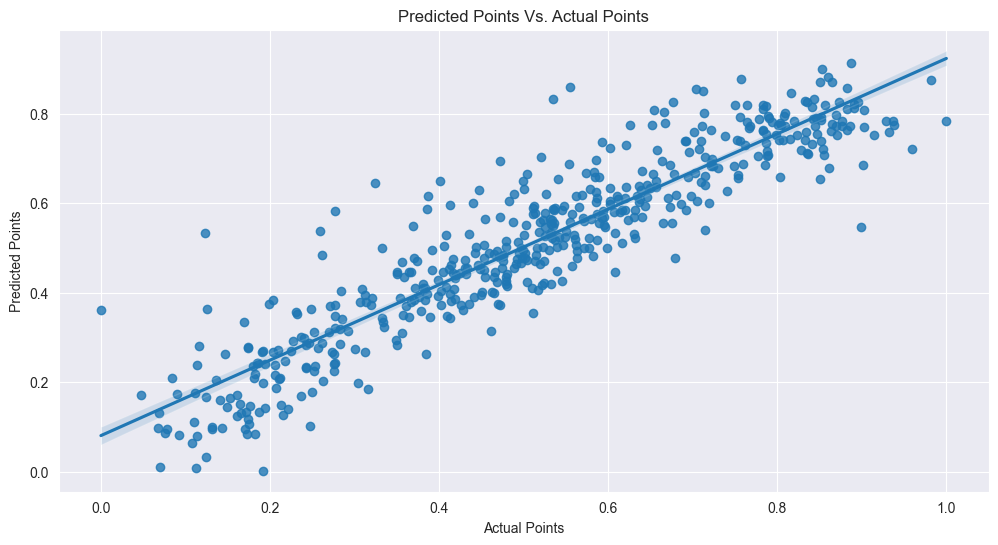

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

> **We can see Error Terms have approximatly a Constant Variance, Hence it follows the Assumption of Homoscedasticity**

## **Model Evaluation on Test Dataset**

#### *Applying the MinMax scaling on the test sets*

In [ ]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,weekday,workingday,temp,hum,windspeed,summer,fall,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Clear_clouds,cloudy,Light
184,1.0,0,1,1,0,0.831783,0.657364,0.084219,0,1,...,False,True,False,False,False,False,False,0,1,0
535,1.0,1,0,3,1,0.901354,0.610133,0.153728,1,0,...,False,False,False,True,False,False,False,1,0,0
299,1.0,0,0,4,1,0.511964,0.837699,0.334206,0,0,...,False,False,False,False,True,False,False,0,1,0
221,1.0,0,0,3,1,0.881625,0.437098,0.339570,0,1,...,False,False,False,True,False,False,False,1,0,0
152,1.0,0,0,4,1,0.817246,0.314298,0.537414,1,0,...,False,False,False,False,True,False,False,1,0,0


In [ ]:
#Dropping the Features which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['weekday', 'workingday', 'Feb', 'April', 'May', 'June', 'July', 'Nov',
       'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday','Clear_clouds','fall','March'],axis=1)

# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)

y_test_pred.head()

184    0.398766
535    0.913227
299    0.414491
221    0.623354
152    0.621752
dtype: float64

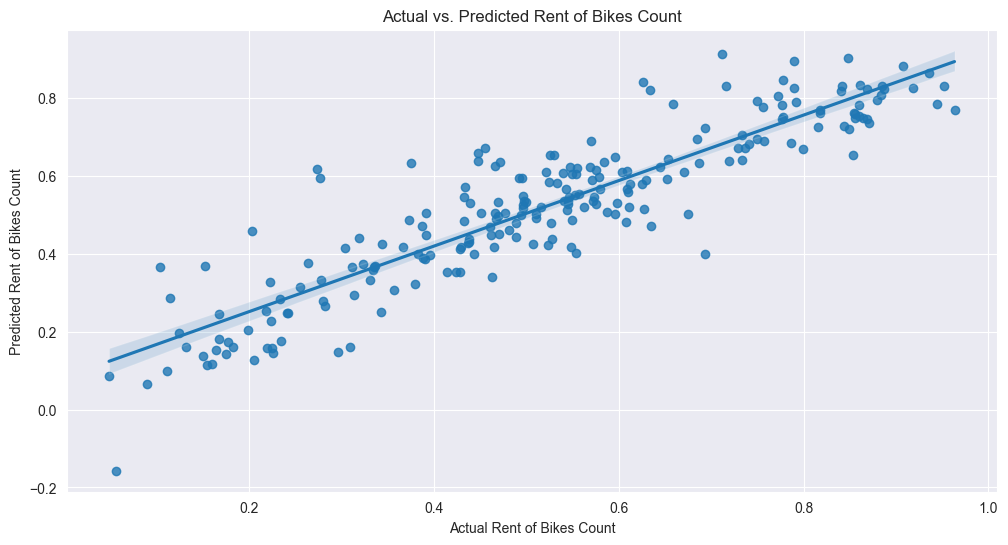

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

> ***Above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count.***

In [ ]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8116537323246351

> **The Final Model accuray is around 81.1%.**

>deviation is just 2 % which is acceptable



In [ ]:
Cofficients = round(lr_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp         0.53
const        0.24
yr           0.23
winter       0.14
Sep          0.13
summer       0.11
Aug          0.06
Oct          0.04
cloudy      -0.05
holiday     -0.09
hum         -0.18
windspeed   -0.19
Light       -0.24
dtype: float64

In [ ]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.53 * temp + 0.24 * const + 0.23 * yr + 0.14 * winter + 0.13 * Sep + 0.11 * summer + 0.06 * Aug + 0.04 * Oct + -0.05 * cloudy + -0.09 * holiday + -0.18 * hum + -0.19 * windspeed + -0.24 * Light + 

C:\Users\melvi\AppData\Local\Temp\ipykernel_11312\1775672720.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Temperature stands out as the most influential factor positively impacting business.
Conversely, environmental conditions such as  humidity, wind speed, and cloud cover have a negative effect on business.

T